# Deliverable 2: Data-Preprocessing

## Robert, Dave and Stan
--------------------------------------------------------------------------------------------------------------------------------


### We hope to predict the winner of the 2018 NBA Playoffs 
### Collected data from 

  1. https://www.cbssports.com/nba/standings 
      * This website was found using a google search. We scraped the end of season statistics to help give us viable features for our model.
  2. https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season 
      * This website was found with a google search. We used sweat equity to uncover more final season statistics for playoff teams "for" and "against". This will help us when training our model with the playoff teams.

Question: Can we use machine learning, with statistics from the regular season and past playoff performances, to predict the outcome of the NBA playoffs? We want to investigate if we can successfully have a model that identifies key features in a winning team and then can predict future winners. The plan is to have the model train on statistics from previous seasons and associate those with the teams that won, and then run the statistics from this past season to see who will win the 2018 playoffs. 

In this deliverable, we gathered more data and preprocessed all of our data further to prepare it to be fed into a machine learning model in the next deliverable. Below are some of our visualizations of our data. The preprocessing steps can be found in "Preprocessing.ipynb" and "Series_Preprocess.ipynb". The final CSVs for the model can be found in the direcorty "./preprocessed/final/".

In [47]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
import math

In [48]:
stats_against_1314 = pd.read_csv("./preprocessed/opp_stats1314.csv", sep = ',')
stats_against_1415 = pd.read_csv("./preprocessed/opp_stats1415.csv", sep = ',')
stats_against_1516 = pd.read_csv("./preprocessed/opp_stats1516.csv", sep = ',')
stats_against_1617 = pd.read_csv("./preprocessed/opp_stats1617.csv", sep = ',')
stats_against_1718 = pd.read_csv("./preprocessed/opp_stats1718.csv", sep = ',')

stats_for_1314 = pd.read_csv("./preprocessed/team_stats1314.csv", sep = ',')
stats_for_1415 = pd.read_csv("./preprocessed/team_stats1415.csv", sep = ',')
stats_for_1516 = pd.read_csv("./preprocessed/team_stats1516.csv", sep = ',')
stats_for_1617 = pd.read_csv("./preprocessed/team_stats1617.csv", sep = ',')
stats_for_1718 = pd.read_csv("./preprocessed/team_stats1718.csv", sep = ',')

stats_for_1314.sort_values(by = ['Rk'])
stats_for_1415.sort_values(by = ['Rk'])
stats_for_1516.sort_values(by = ['Rk'])
stats_for_1617.sort_values(by = ['Rk'])
stats_for_1718.sort_values(by = ['Rk'])

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
1,1,1,Houston Rockets*,82,240.9,38.7,84.2,0.460,15.3,42.3,...,9.0,34.5,43.5,21.5,8.5,4.8,13.8,19.5,112.4,79.3
3,3,2,Toronto Raptors*,82,241.8,41.3,87.4,0.472,11.8,33.0,...,9.8,34.2,44.0,24.3,7.6,6.1,13.4,21.8,111.7,72.0
0,0,3,Golden State Warriors*,82,240.6,42.8,85.1,0.503,11.3,28.9,...,8.4,35.1,43.5,29.3,8.0,7.5,15.5,19.6,113.5,70.7
13,13,4,Boston Celtics*,82,241.5,38.3,85.1,0.450,11.5,30.4,...,9.4,35.1,44.5,22.5,7.4,4.6,14.0,19.7,104.0,67.1
5,5,5,Philadelphia 76ers*,82,241.2,40.8,86.6,0.472,11.0,29.8,...,10.9,36.5,47.4,27.1,8.3,5.1,16.5,22.1,109.8,63.4
4,4,6,Cleveland Cavaliers*,82,240.6,40.4,84.8,0.476,12.0,32.1,...,8.5,33.7,42.1,23.4,7.1,3.8,13.7,18.6,110.9,61.0
10,10,7,Portland Trail Blazers*,82,240.9,39.3,87.0,0.452,10.3,28.1,...,10.2,35.3,45.5,19.5,7.0,5.2,13.5,19.5,105.6,59.8
2,2,8,New Orleans Pelicans*,82,243.4,42.7,88.3,0.483,10.2,28.2,...,8.7,35.7,44.3,26.8,8.0,5.9,14.9,19.1,111.7,58.5
7,7,8,Oklahoma City Thunder*,82,241.8,39.9,88.0,0.453,10.7,30.4,...,12.5,32.6,45.1,21.3,9.1,5.0,14.0,20.2,107.9,58.5
11,11,8,Indiana Pacers*,82,240.9,40.8,86.4,0.472,9.0,24.5,...,9.6,32.7,42.3,22.2,8.8,4.1,13.3,18.8,105.6,58.5


In [64]:
stats_for_1314_corr = stats_for_1314[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1516_corr = stats_for_1516[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1617_corr = stats_for_1617[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1718_corr = stats_for_1718[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]


stats_for_1415_corr = stats_for_1415[['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','WIN%']]
stats_for_1415_corr.corr()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,WIN%
FG,1.000000,0.674208,0.719538,0.334847,0.217550,0.519681,0.333666,0.053946,0.618169,-0.387093,0.379838,0.105600,0.706657,0.261827,0.176845,-0.287426,0.084605,0.712542,0.472978
FGA,0.674208,1.000000,-0.026960,0.281648,0.332864,-0.070927,0.167284,0.069234,0.178246,0.150818,0.413558,0.429339,0.315195,0.017803,-0.084035,-0.208282,0.144983,0.489363,0.054229
FG%,0.719538,-0.026960,1.000000,0.176180,-0.028696,0.760062,0.306698,0.018997,0.665858,-0.681048,0.119160,-0.274341,0.664129,0.339396,0.309888,-0.201540,-0.014833,0.495036,0.572437
3P,0.334847,0.281648,0.176180,1.000000,0.968995,0.481491,-0.776454,-0.906446,0.736533,-0.071313,0.113030,0.047808,0.327562,0.242740,0.154774,0.058469,0.016631,0.834963,0.627015
3PA,0.217550,0.332864,-0.028696,0.968995,1.000000,0.254948,-0.824043,-0.917667,0.656595,0.043446,0.040611,0.048995,0.180570,0.204531,0.007301,0.068663,0.087000,0.753918,0.477123
3P%,0.519681,-0.070927,0.760062,0.481491,0.254948,1.000000,-0.133365,-0.299604,0.525383,-0.368272,0.293955,0.041673,0.636759,0.206220,0.631724,0.033122,-0.197645,0.566646,0.688882
2P,0.333666,0.167284,0.306698,-0.776454,-0.824043,-0.133365,1.000000,0.942269,-0.321777,-0.190224,0.143319,0.023331,0.145835,-0.067871,-0.033890,-0.250090,0.037885,-0.358619,-0.309409
2PA,0.053946,0.069234,0.018997,-0.906446,-0.917667,-0.299604,0.942269,1.000000,-0.619522,0.017589,0.131301,0.129081,-0.058213,-0.208878,-0.043135,-0.160407,-0.030946,-0.591384,-0.481912
2P%,0.618169,0.178246,0.665858,0.736533,0.656595,0.525383,-0.321777,-0.619522,1.000000,-0.496485,-0.048573,-0.321908,0.504532,0.447240,0.037486,-0.128976,0.192497,0.827145,0.649455
ORB,-0.387093,0.150818,-0.681048,-0.071313,0.043446,-0.368272,-0.190224,0.017589,-0.496485,1.000000,-0.004983,0.525936,-0.513729,-0.282077,0.164017,0.276520,0.171989,-0.190909,-0.350964


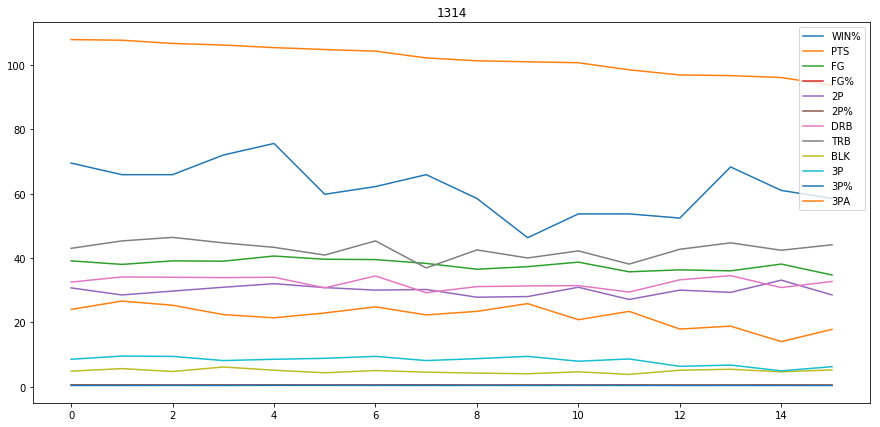

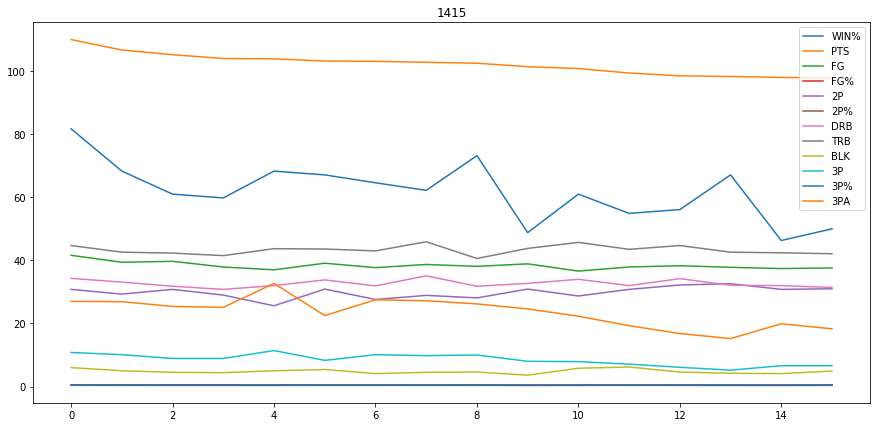

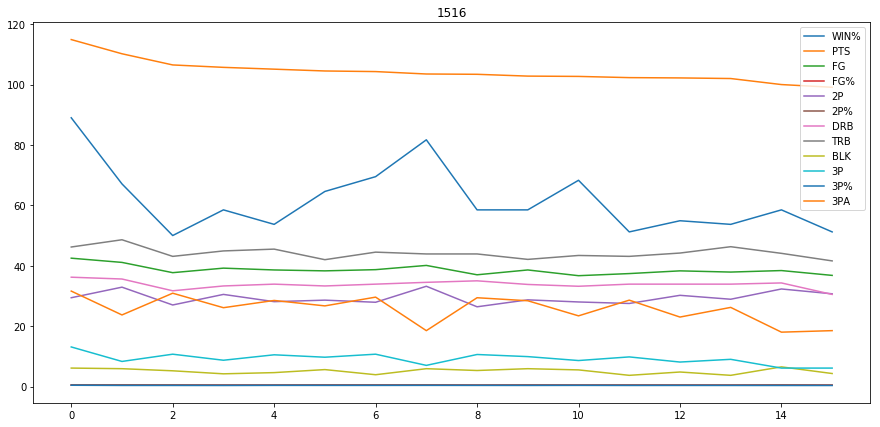

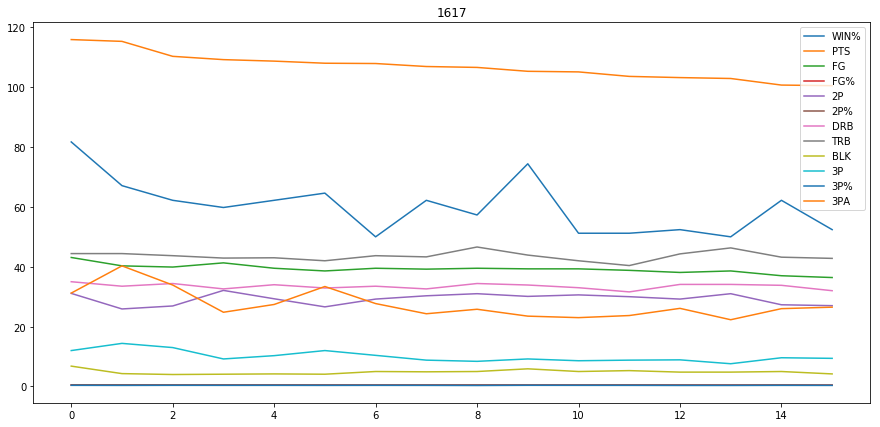

In [65]:
stats_for_1314_sign = stats_for_1314[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1415_sign = stats_for_1415[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1516_sign = stats_for_1516[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1617_sign = stats_for_1617[['Team', 'WIN%', 'PTS', 'FG', 'FG%', '2P', '2P%', 'DRB', 'TRB', 'BLK', '3P', '3P%', '3PA']]
stats_for_1314_sign.plot(title = '1314', figsize = (15, 7))
stats_for_1415_sign.plot(title = '1415', figsize = (15, 7))
stats_for_1516_sign.plot(title = '1516', figsize = (15, 7))
stats_for_1617_sign.plot(title = '1617', figsize = (15, 7))

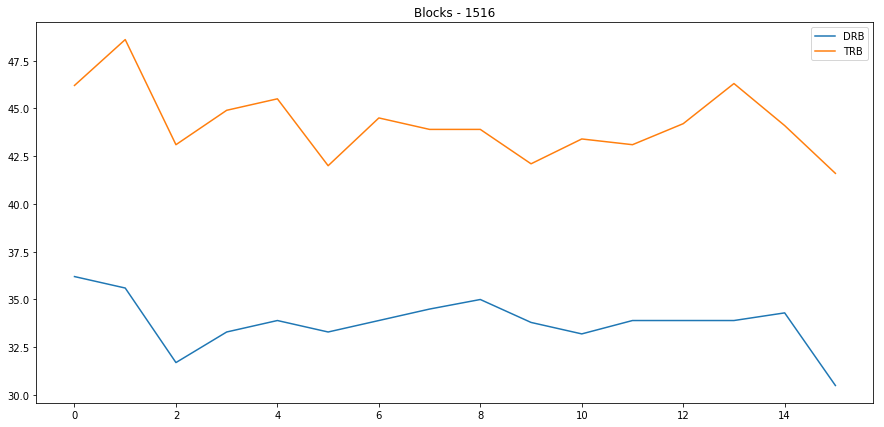

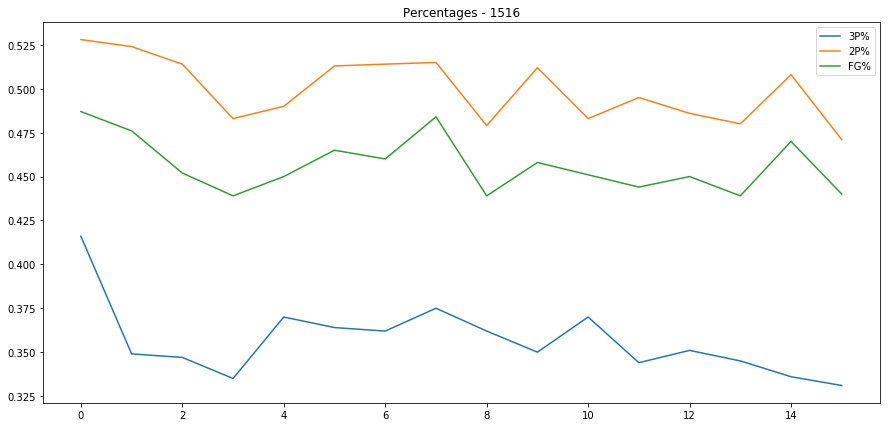

In [66]:
stats_for_1516_blocks = stats_for_1516[['Team','DRB', 'TRB']]
stats_for_1516_perc = stats_for_1516[['Team','3P%', '2P%', 'FG%']]
stats_for_1516_blocks.plot(title = 'Blocks - 1516', figsize = (15, 7))
stats_for_1516_perc.plot(title = 'Percentages - 1516', figsize = (15,7))

In [67]:
stats_for_1516_pts = stats_for_1516[['Team', 'PTS']]

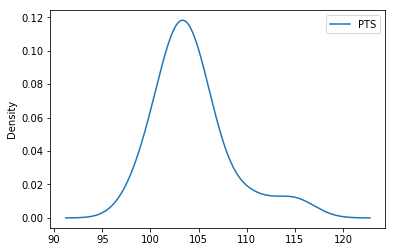

In [68]:
stats_for_1516_pts.plot(kind = 'density')

In [69]:
sc.stats.normaltest(stats_for_1516_pts['PTS'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=11.144367031956026, pvalue=0.0038021692647695602)

C:\Users\Robert\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


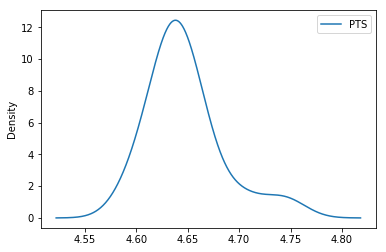

In [70]:
normalized = np.log(stats_for_1516_pts['PTS'])
stats_for_1516_pts['PTS'] = normalized
stats_for_1516_pts.plot(kind = 'density')

In [71]:
sc.stats.normaltest(stats_for_1516_pts['PTS'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=9.795190986875703, pvalue=0.00746450997282333)

In [72]:
sc.stats.normaltest(stats_for_1415_sign['3P%'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.3182813573819193, pvalue=0.8528763689981723)

In [73]:
sc.stats.normaltest(stats_for_1415_sign['2P%'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.9748133038791216, pvalue=0.6142172095329178)

In [74]:
sc.stats.normaltest(stats_for_1415_sign['TRB'])

C:\Users\Robert\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.1428180361294351, pvalue=0.9310809852913148)

In [75]:
rebounds = stats_for_1516[['WIN%', 'TRB', '3P%', 'PTS']]
rebounds.head()

,WIN%,TRB,3P%,PTS
0,89.0,46.2,0.416,114.9
1,67.1,48.6,0.349,110.2
2,50.0,43.1,0.347,106.5
3,58.5,44.9,0.335,105.7
4,53.7,45.5,0.370,105.1


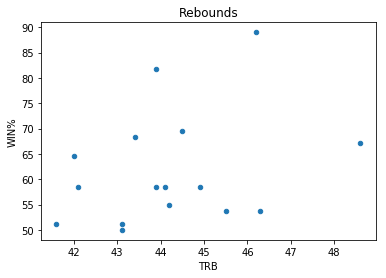

In [76]:
rebounds.plot(title = 'Rebounds', x = 'TRB' , y = 'WIN%', kind = 'scatter')

In [79]:
win_perc_1314 = stats_for_1314_corr.corr().transpose()['WIN%']
win_perc_1415 = stats_for_1415_corr.corr().transpose()['WIN%']
win_perc_1516 = stats_for_1516_corr.corr().transpose()['WIN%']
win_perc_1617 = stats_for_1617_corr.corr().transpose()['WIN%']
win_perc_1718 = stats_for_1718_corr.corr().transpose()['WIN%']



In [83]:
avg_correlations = (win_perc_1314 + win_perc_1415 + win_perc_1516 + win_perc_1617 + win_perc_1718)/5

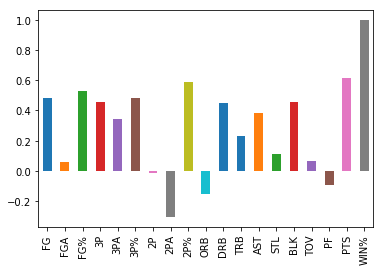

In [85]:
avg_correlations.plot(kind = 'bar')